<a href="https://colab.research.google.com/github/Rio-Octavianus/UTS-Machine-Learning-2025-2026-Take-Home-/blob/main/UTS_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== HASIL CLUSTERING ===
   Age Sex  Cholesterol  RestingBP  HeartDisease  Cluster
0   40   M        289.0      140.0             0        2
1   49   F          NaN      160.0             1        1
2   37   M        283.0      130.0             0        2
3   48   F        214.0      138.0             1        0
4   54   M        195.0      150.0             0        1

Nilai SSE : 10499.064877156125
Silhouette Score : 0.15427770546875666


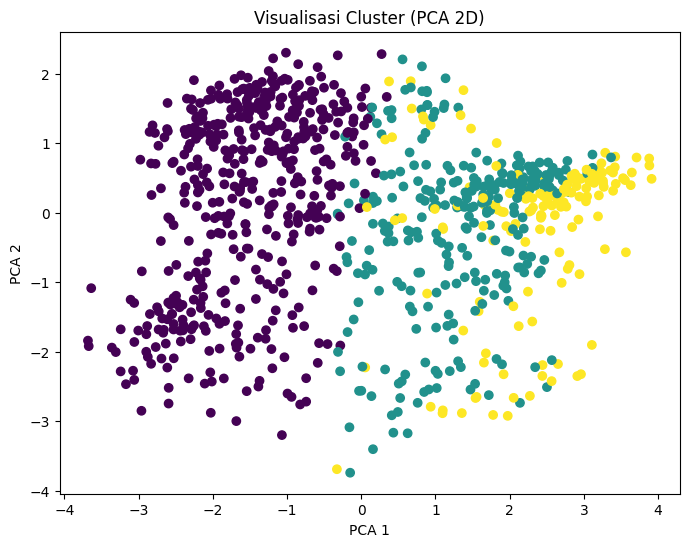

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/isnanmulia/lecture-datasets/main/heart_modified.csv"
df = pd.read_csv(url)

X = df.drop(columns=["HeartDisease"])

X = X.fillna(X.median(numeric_only=True))

X_encoded = pd.get_dummies(X, drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

sse = kmeans.inertia_

sil_score = silhouette_score(X_scaled, kmeans.labels_)

df['Cluster'] = kmeans.labels_

print("=== HASIL CLUSTERING ===")
print(df[['Age', 'Sex', 'Cholesterol', 'RestingBP', 'HeartDisease', 'Cluster']].head())
print("\nNilai SSE :", sse)
print("Silhouette Score :", sil_score)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans.labels_, cmap='viridis')
plt.title('Visualisasi Cluster (PCA 2D)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()